In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
cd=pd.read_csv("C:/Users/prami/OneDrive/Desktop/final_year_project/credit_default.csv")

In [3]:
cd.shape

(30000, 25)

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
x=cd.isnull().sum()/cd.shape[0]

In [6]:
x

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

In [7]:
cd=cd.drop(["ID"],axis=1)

In [8]:
cd.rename(columns={"PAY_0":"PAY_1"},inplace=True)

In [9]:
#cd["PAY_1"]=cd["PAY_1"].replace([0,-1,-2],0)
#cd["PAY_2"]=cd["PAY_2"].replace([0,-1,-2],0)

In [10]:
cd["PAY_1"][cd["PAY_1"]<=0]=0

C:\Users\prami\AppData\Local\Temp/ipykernel_14888/2587912813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_1"][cd["PAY_1"]<=0]=0


In [11]:
cd["PAY_2"][cd["PAY_2"]<=0]=0


C:\Users\prami\AppData\Local\Temp/ipykernel_14888/1281667785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_2"][cd["PAY_2"]<=0]=0


In [12]:
cd["PAY_3"][cd["PAY_3"]<=0]=0

C:\Users\prami\AppData\Local\Temp/ipykernel_14888/3609026062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_3"][cd["PAY_3"]<=0]=0


In [13]:
cd["PAY_4"][cd["PAY_4"]<=0]=0

C:\Users\prami\AppData\Local\Temp/ipykernel_14888/514302994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_4"][cd["PAY_4"]<=0]=0


In [14]:
cd["PAY_5"][cd["PAY_5"]<=0]=0

C:\Users\prami\AppData\Local\Temp/ipykernel_14888/1932432415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_5"][cd["PAY_5"]<=0]=0


In [15]:
cd["PAY_6"][cd["PAY_6"]<=0]=0

C:\Users\prami\AppData\Local\Temp/ipykernel_14888/3323490004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd["PAY_6"][cd["PAY_6"]<=0]=0


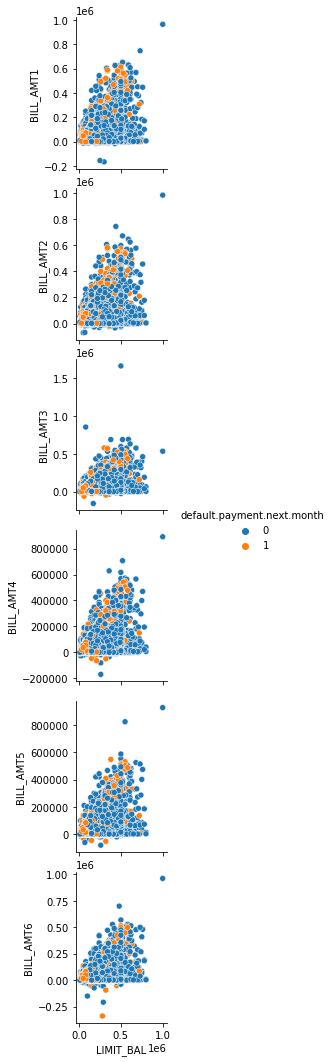

In [16]:
g = sns.pairplot(cd,x_vars=["LIMIT_BAL"],y_vars=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],hue="default.payment.next.month")

In [17]:
#cd["PAY_1"][cd["PAY_1"]<=0]=0
cd["PAY_1"].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

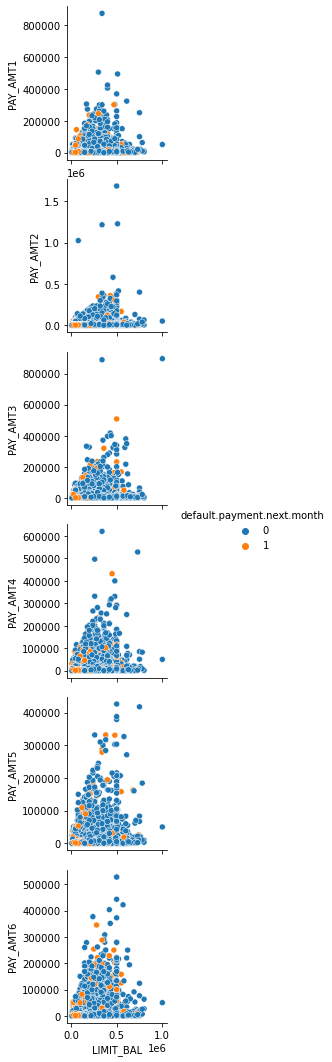

In [18]:
g1 = sns.pairplot(cd,x_vars=["LIMIT_BAL"],y_vars=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],hue="default.payment.next.month")


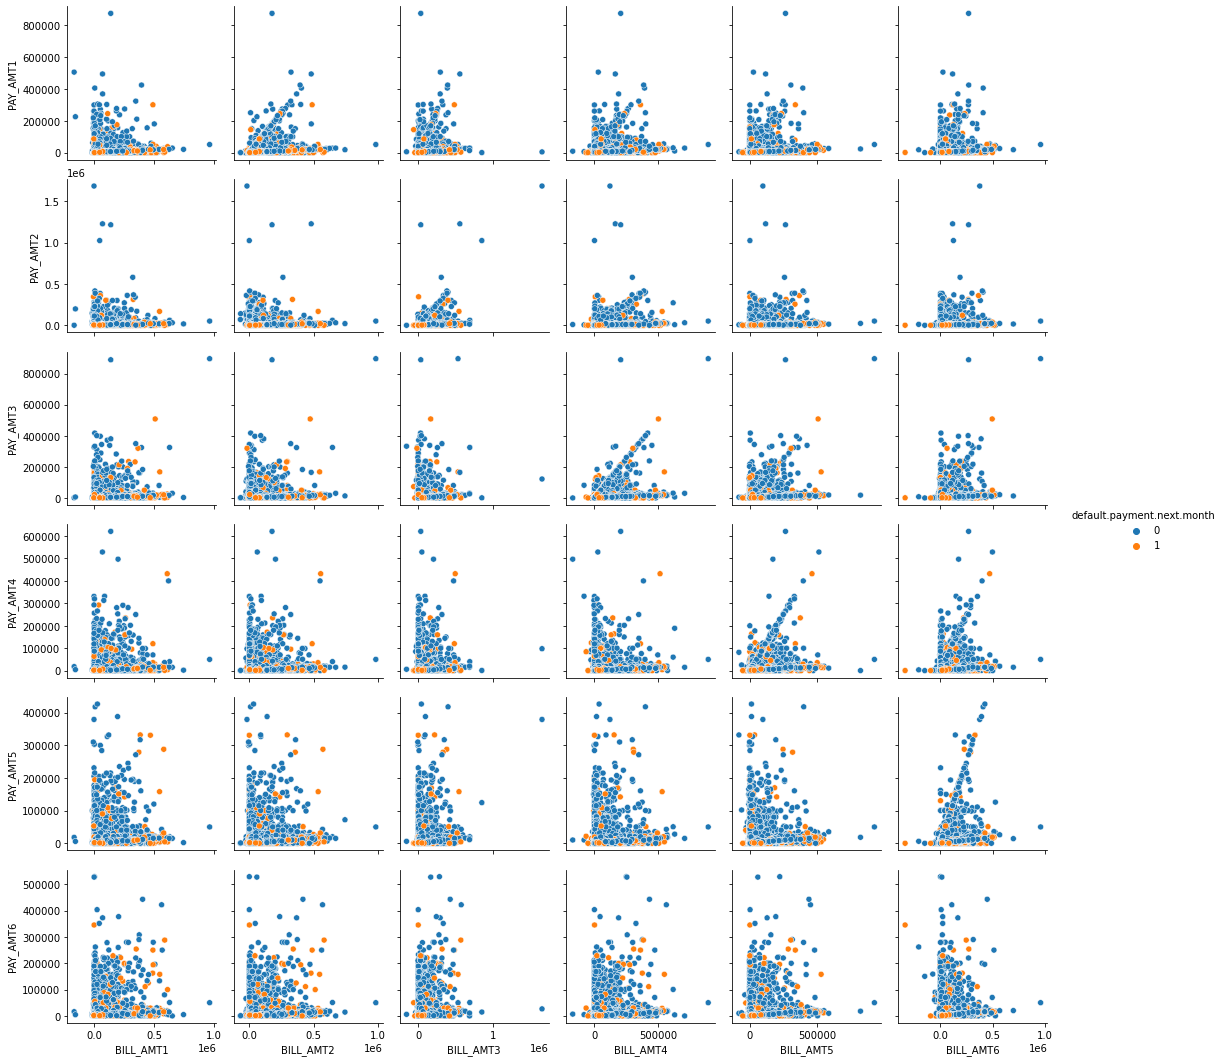

In [19]:
g2= sns.pairplot(cd,x_vars=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],y_vars=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],hue="default.payment.next.month")


In [20]:
#g3= sns.pairplot(cd,x_vars=["BILL_AMT2"],y_vars=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"],hue="default.payment.next.month")


In [21]:
from scipy.stats import chi2_contingency

In [22]:
chi2,p1,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_1,cd["default.payment.next.month"]))

In [23]:
chi2,p2,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_2,cd["default.payment.next.month"]))
chi2,p3,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_3,cd["default.payment.next.month"]))
chi2,p4,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_4,cd["default.payment.next.month"]))
chi2,p5,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_5,cd["default.payment.next.month"]))
chi2,p6,dof,exp=chi2_contingency(pd.crosstab(cd.PAY_1,cd["default.payment.next.month"]))

In [24]:
p=[p1,p2,p3,p4,p5,p6]

In [25]:
col=["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for i in zip(p,col):
    print(i)

(0.0, 'PAY_1')
(0.0, 'PAY_2')
(0.0, 'PAY_3')
(0.0, 'PAY_4')
(0.0, 'PAY_5')
(0.0, 'PAY_6')


In [26]:
d1=pd.DataFrame([cd["LIMIT_BAL"],cd["PAY_1"],cd["PAY_2"],cd["PAY_3"],cd["PAY_4"],cd["PAY_5"],cd["PAY_6"],cd["BILL_AMT1"],cd["BILL_AMT2"],cd["BILL_AMT3"],cd["BILL_AMT4"],cd["BILL_AMT5"],cd["BILL_AMT6"],cd["PAY_AMT1"],cd["PAY_AMT2"],cd["PAY_AMT3"],cd["PAY_AMT4"],cd["PAY_AMT5"],cd["PAY_AMT6"]]).transpose()


In [27]:
collist=["LIMIT_BAL","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]


In [28]:
cd1=cd[collist]

In [29]:
np.set_printoptions(suppress=True,precision=6)

In [30]:
y=cd["default.payment.next.month"]


In [31]:
model=linear_model.LogisticRegression(penalty="l2",C=1000)


In [32]:
model.fit(cd1,y)

LogisticRegression(C=1000)

In [33]:
ser=pd.Series(model.coef_[0])
ser.index=cd1.columns
ser.abs().sort_values(ascending=False)

PAY_AMT1     3.890840e-05
PAY_AMT2     2.682624e-05
PAY_AMT4     1.147750e-05
BILL_AMT1    1.109162e-05
PAY_AMT3     1.090396e-05
PAY_AMT5     6.721732e-06
BILL_AMT2    5.961705e-06
LIMIT_BAL    5.297016e-06
BILL_AMT5    4.244145e-06
BILL_AMT3    2.090270e-06
BILL_AMT6    2.037276e-06
PAY_AMT6     1.663910e-06
BILL_AMT4    8.900536e-07
PAY_1        9.475945e-08
PAY_2        7.246999e-08
PAY_3        5.893321e-08
PAY_4        5.420975e-08
PAY_5        5.046010e-08
PAY_6        4.530545e-08
dtype: float64

In [34]:
collist=["LIMIT_BAL","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
cd1=cd[collist]

In [36]:
model=linear_model.LogisticRegression(penalty="l2",C=1000)
model.fit(cd1,y)
ser=pd.Series(model.coef_[0])
ser.index=cd1.columns
ser.abs().sort_values(ascending=False)


PAY_AMT1     0.000028
PAY_AMT2     0.000021
PAY_AMT4     0.000007
PAY_AMT3     0.000007
PAY_AMT5     0.000005
LIMIT_BAL    0.000005
PAY_AMT6     0.000002
dtype: float64

In [40]:
np.set_printoptions(suppress=True,precision=6)
X=cd.drop("default.payment.next.month",axis=1)
y=cd["default.payment.next.month"]

In [41]:
from sklearn import model_selection
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import metrics

In [42]:
cd_modify=cd.drop(["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","AGE"],axis=1)
X=cd_modify.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]

In [43]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=37)

In [44]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj =model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [46]:
modelstats1(Xtrain,Xtest,ytrain,ytest)

{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.800333,0.572144,0.400100,0.657344
1,LR-test,0.805667,0.564045,0.392188,0.654992
2,DecisionTree-train,0.983111,0.996772,0.926951,0.963047
3,DecisionTree-test,0.732000,0.371069,0.368750,0.599629
4,KNN(5)-train,0.814000,0.680638,0.306037,0.632523
5,KNN(5)-test,0.762333,0.374570,0.170313,0.546597
6,NB-train,0.469185,0.274776,0.848065,0.604546
7,NB-test,0.463000,0.265798,0.860938,0.608011


In [48]:
collist=["SEX","MARRIAGE","EDUCATION","AGE"]
cd2=cd[collist]
model=linear_model.LogisticRegression(penalty="l2",C=1000)
model.fit(cd2,y)
ser=pd.Series(model.coef_[0])
ser.index=cd2.columns
ser.abs().sort_values(ascending=False)
modelstats1(Xtrain,Xtest,ytrain,ytest)

{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.800333,0.572144,0.400100,0.657344
1,LR-test,0.805667,0.564045,0.392188,0.654992
2,DecisionTree-train,0.983111,0.996772,0.926951,0.963047
3,DecisionTree-test,0.735333,0.375405,0.362500,0.599470
4,KNN(5)-train,0.814000,0.680638,0.306037,0.632523
5,KNN(5)-test,0.762333,0.374570,0.170313,0.546597
6,NB-train,0.469185,0.274776,0.848065,0.604546
7,NB-test,0.463000,0.265798,0.860938,0.608011


In [49]:
collist_modify=["SEX","MARRIAGE","EDUCATION","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","LIMIT_BAL","default.payment.next.month"]
Xtrain.columns
cd3=cd[collist_modify]
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777725,0.000000,0.000000,0.499924
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.994549,0.994452,0.980936,0.989686
3,DecisionTree-test,0.699333,0.324449,0.363543,0.577634
4,KNN(5)-train,0.815804,0.674603,0.330097,0.642311
5,KNN(5)-test,0.758889,0.390805,0.210093,0.559991
6,NB-train,0.360431,0.244822,0.901324,0.553636
7,NB-test,0.353556,0.237966,0.906282,0.553878


In [51]:
collist_modify=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","LIMIT_BAL","default.payment.next.month"]
cd3=cd[collist_modify]
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777725,0.000000,0.000000,0.499924
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.990157,0.988981,0.966461,0.981693
3,DecisionTree-test,0.704222,0.329868,0.359423,0.579258
4,KNN(5)-train,0.812588,0.661443,0.320388,0.636776
5,KNN(5)-test,0.760222,0.392857,0.203913,0.558602
6,NB-train,0.360667,0.244843,0.900971,0.553662
7,NB-test,0.353556,0.237966,0.906282,0.553878


In [52]:
collist_modify=["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","LIMIT_BAL","default.payment.next.month"]
cd3=cd[collist_modify]
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 9}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777843,0.000000,0.000000,0.500000
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.843529,0.781702,0.410238,0.688759
3,DecisionTree-test,0.814444,0.634387,0.330587,0.639082
4,KNN(9)-train,0.823098,0.685531,0.376346,0.663520
5,KNN(9)-test,0.810222,0.616302,0.319258,0.632284
6,NB-train,0.778353,0.685714,0.004237,0.501841
7,NB-test,0.784444,0.666667,0.002060,0.500888


In [53]:
collist_modify=["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","LIMIT_BAL","default.payment.next.month"]
cd3=cd[collist_modify]
cd3.columns
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777725,0.000000,0.000000,0.499924
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.990157,0.988981,0.966461,0.981693
3,DecisionTree-test,0.701111,0.324248,0.355304,0.575782
4,KNN(5)-train,0.812588,0.661443,0.320388,0.636776
5,KNN(5)-test,0.760222,0.392857,0.203913,0.558602
6,NB-train,0.360667,0.244843,0.900971,0.553662
7,NB-test,0.353556,0.237966,0.906282,0.553878


In [54]:
collist_modify=["PAY_AMT1","PAY_AMT2","default.payment.next.month"]
cd3=cd[collist_modify]
cd3.columns
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777843,0.000000,0.000000,0.500000
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.902431,0.915077,0.618182,0.800898
3,DecisionTree-test,0.706444,0.259615,0.194645,0.520955
4,KNN(5)-train,0.791765,0.579418,0.228597,0.590603
5,KNN(5)-test,0.748889,0.289125,0.112255,0.518157
6,NB-train,0.371451,0.244842,0.877670,0.552271
7,NB-test,0.370667,0.239866,0.883625,0.556576


In [56]:
X=cd.drop("default.payment.next.month",axis=1)
y=cd["default.payment.next.month"]
model=linear_model.LogisticRegression(penalty="l2",C=1000)
model.fit(X,y)
ser=pd.Series(model.coef_[0])
ser.index=X.columns
ser.abs().sort_values(ascending=False)
modelstats1(Xtrain,Xtest,ytrain,ytest)

C:\Users\prami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prami\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.777843,0.000000,0.000000,0.500000
1,LR-test,0.784222,0.000000,0.000000,0.500000
2,DecisionTree-train,0.902431,0.915077,0.618182,0.800898
3,DecisionTree-test,0.704667,0.256131,0.193615,0.519448
4,KNN(5)-train,0.791765,0.579418,0.228597,0.590603
5,KNN(5)-test,0.748889,0.289125,0.112255,0.518157
6,NB-train,0.371451,0.244842,0.877670,0.552271
7,NB-test,0.370667,0.239866,0.883625,0.556576


In [50]:
collist_modify=["PAY_1","PAY_3","PAY_6","PAY_2","PAY_AMT1","PAY_AMT2","PAY_AMT3","BILL_AMT1","default.payment.next.month"]
cd3=cd[collist_modify]
X=cd3.drop("default.payment.next.month",axis=1)
y=cd_modify["default.payment.next.month"]
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.1,random_state=0)
modelstats1(Xtrain,Xtest,ytrain,ytest)


{'n_neighbors': 5}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.800333,0.572144,0.400100,0.657344
1,LR-test,0.805667,0.564045,0.392188,0.654992
2,DecisionTree-train,0.983111,0.996772,0.926951,0.963047
3,DecisionTree-test,0.738000,0.383013,0.373437,0.605151
4,KNN(5)-train,0.814000,0.680638,0.306037,0.632523
5,KNN(5)-test,0.762333,0.374570,0.170313,0.546597
6,NB-train,0.469185,0.274776,0.848065,0.604546
7,NB-test,0.463000,0.265798,0.860938,0.608011
